## Customer Churn Prediction

This is a customer churn prediction project using machine learning. The goal is to predict whether a customer will churn (leave) based on various features.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Data Preprocessing

- Loaded the dataset from a CSV file.
- Renamed the 'Churn?' column to 'Churn'.
- Applied one-hot encoding to the 'State' column.
- Dropped the 'Phone' column.
- Mapped 'yes' and 'no' to 1 and 0 in 'Int'l Plan' and 'VMail Plan' columns.
- Encoded the 'Churn' column using LabelEncoder.
- Balanced the dataset using SMOTE to address class imbalance.

In [2]:
data = pd.read_csv("churn_data.csv")

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [5]:
data = data.rename(columns={"Churn?":"Churn"})

In [6]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
data = pd.get_dummies(data, columns=['State'], prefix=['State'])

In [8]:
data.head()

,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,False,False,False,False,False,False,False,False,False,False
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,False,False,False,False,False,False,False,False,False,False
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,False,False,False,False,False,False,False,False,False,False
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,False,False,False,False,False,False,False,False,False,False
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,False,False,False,False,False,False,False,False,False,False


In [9]:
data = data.drop("Phone",axis=1)
data.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False


In [10]:
boolean_mapping = {'no': 0, 'yes': 1}


In [11]:
data["Int'l Plan"] = data["Int'l Plan"].map(boolean_mapping)

In [12]:
data["VMail Plan"] = data["VMail Plan"].map(boolean_mapping)

In [13]:
data["Churn"].value_counts()

Churn
False.    2850
True.      483
Name: count, dtype: int64

In [14]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
data["Churn"] = label_encoder.fit_transform(data['Churn'])
data["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [15]:
X = data.drop("Churn",axis=1)
y = data["Churn"]
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)
y.value_counts()

Churn
0    2850
1    2850
Name: count, dtype: int64

### Model Selection

Several machine learning models were considered for this classification task, including:

- Logistic Regression
- K-Nearest Neighbors
- Naive Bayes
- Decision Tree
- Random Forest
- Support Vector Machine
- Gradient Boosting
- Neural Network

In [16]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(),
}


### Hyperparameter Tuning

Grid search was used to tune hyperparameters for each model. Hyperparameter grids were defined for each model to find the best combination of parameters.


In [17]:
grid = {
    "Logistic Regression": {"C": [0.1, 1, 10, 100]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7, 9]},
    "Naive Bayes": {},
    "Decision Tree": {"max_depth": [None, 10, 20, 30]},
    "Random Forest": {"n_estimators": [10, 50, 100, 200], "max_depth": [None, 10, 20, 30]},
    "Support Vector Machine": {"kernel": ["linear","rbf"], "C": [0.1, 1, 10, 100]},
    "Gradient Boosting": {"n_estimators": [10, 50, 100, 200], "learning_rate": [0.1, 0.01, 0.001]},
    "Neural Network": {
        "hidden_layer_sizes": [(512, 256, 128), (256, 128, 64), (128, 64, 32)],
        "max_iter": [500, 1000, 2000]},
}

### Function for performing classification

In [18]:
def perform_classification(X_train,X_test,y_train,y_test,selected_model):
    
    try:
        

        if selected_model in models:  # Check if selected_model is valid
            model_instance = models[selected_model]
            grid_search = GridSearchCV(model_instance, grid[selected_model], cv=5)
            grid_search.fit(X_train, y_train)
            best_params = grid_search.best_params_
            model_instance.set_params(**best_params)
            model_instance.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model_instance.predict(X_test)
            
            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Generate classification report
            report = classification_report(y_test, y_pred,output_dict=True)

             # Create a confusion matrix
            cm = confusion_matrix(y_test, y_pred)

            parameters =  [selected_model, best_params, accuracy, report, cm]

            return  parameters
    except Exception as e:
        return f"Error: {str(e)}"

### Feature Selection

Feature selection was performed using SelectKBest with the f_classif scoring function. This step aimed to select the most relevant features for modeling.


In [19]:
def feature_selection(X,y,k ="all"):
     # Select features and target column
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Initialize StandardScaler
        scaler = StandardScaler()

        # Fit and transform the scaler on training data
        X_train_scaled = scaler.fit_transform(X_train)

        # Transform the test data using the same scaler
        X_test_scaled = scaler.transform(X_test)

        # Initialize SelectKBest with the scoring function (f_classif for classification)
        selector = SelectKBest(score_func=f_classif, k=k)

        # Fit the selector to your training data and transform the features
        X_train_selected = selector.fit_transform(X_train_scaled, y_train)
        X_test_selected = selector.transform(X_test_scaled)
        return X_train_selected, X_test_selected, y_train, y_test
    

In [20]:
X_train,X_test,y_train,y_test = feature_selection(X,y)

### Model Evaluation

Each model was evaluated using the following metrics:

- Accuracy Score
- Classification Report (including precision, recall, and F1-score)
- Confusion Matrix (visualized as a heatmap)

**Model:** Logistic Regression
**Best Hyperparameters:** {'C': 1}
**Accuracy:** 0.91


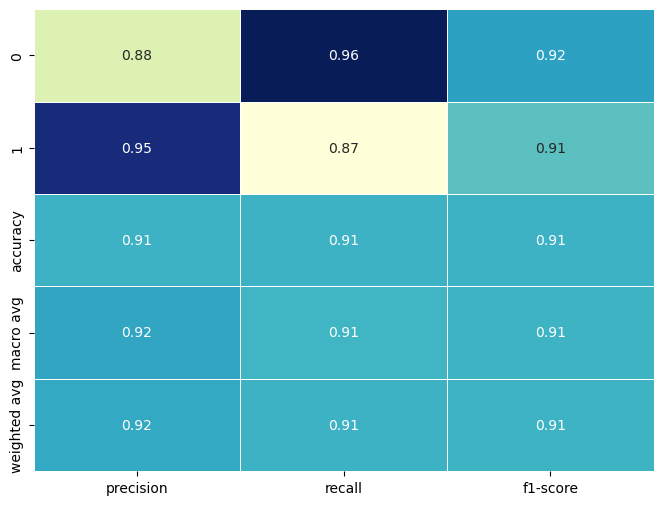

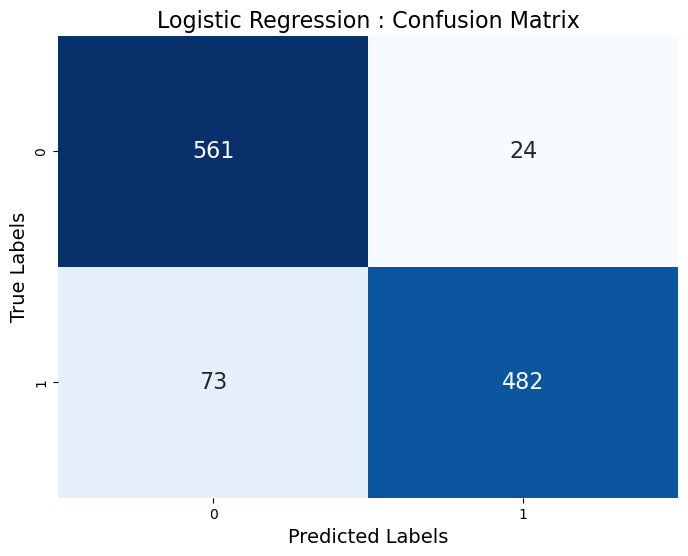

In [21]:
model_performance = {}
performance_lr = perform_classification(X_train,X_test,y_train,y_test,"Logistic Regression")

if performance_lr is not None:
    model_performance.update({performance_lr[0]: f'{performance_lr[2]:.4f}',
                              f"{performance_lr[0]} best_params": performance_lr[1]})
    print(f"**Model:** {performance_lr[0]}")
    print(f"**Best Hyperparameters:** {performance_lr[1]}")
    print(f"**Accuracy:** {performance_lr[2]:.2f}")
    classification_report_df = pd.DataFrame(performance_lr[3]).T
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(classification_report_df.iloc[:, :3], annot=True, cmap="YlGnBu", cbar=False, fmt=".2f", linewidths=0.5)

    plt.show()

if performance_lr[4] is not None:
# Create a heatmap of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(performance_lr[4], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'{performance_lr[0]} : Confusion Matrix', fontsize=16)
    plt.show()

**Model:** K-Nearest Neighbors
**Best Hyperparameters:** {'n_neighbors': 3}
**Accuracy:** 0.89


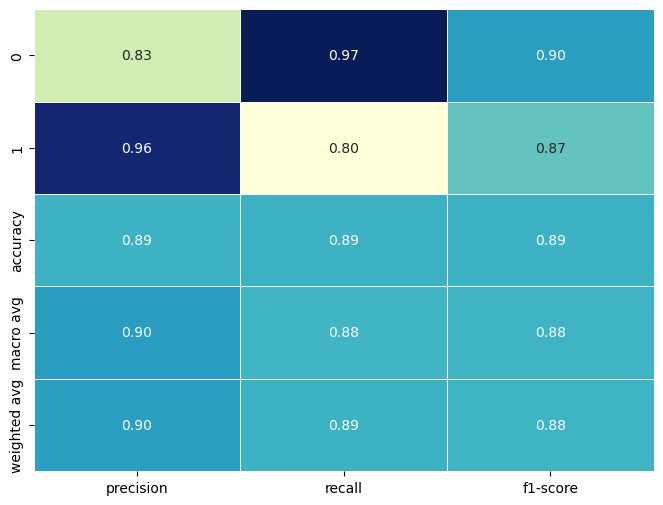

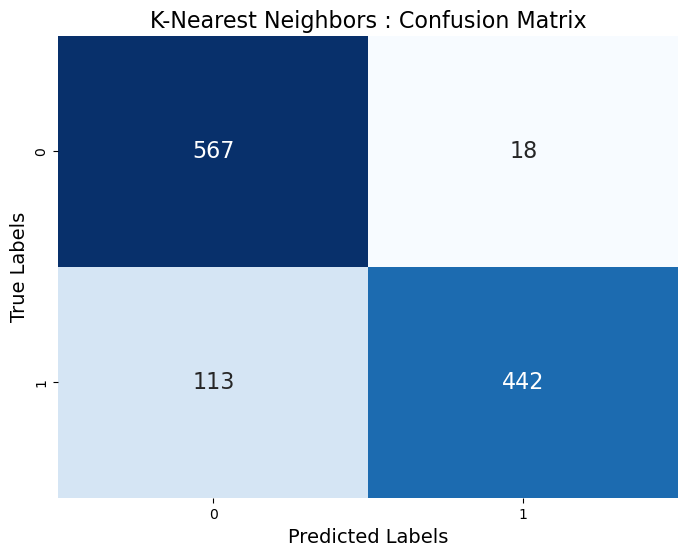

In [22]:
import warnings
# Suppress FutureWarnings related to the mode function
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors")
performance_knn = perform_classification(X_train,X_test,y_train,y_test,"K-Nearest Neighbors")

if performance_knn is not None:
    model_performance.update({performance_knn[0]: f'{performance_knn[2]:.4f}', 
                              f"{performance_knn[0]} best_params": performance_knn[1]})
    print(f"**Model:** {performance_knn[0]}")
    print(f"**Best Hyperparameters:** {performance_knn[1]}")
    print(f"**Accuracy:** {performance_knn[2]:.2f}")
    classification_report_df = pd.DataFrame(performance_knn[3]).T
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(classification_report_df.iloc[:, :3], annot=True, cmap="YlGnBu", cbar=False, fmt=".2f", linewidths=0.5)

    plt.show()

if performance_knn[4] is not None:
# Create a heatmap of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(performance_knn[4], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'{performance_knn[0]} : Confusion Matrix', fontsize=16)
    plt.show()

**Model:** Naive Bayes
**Best Hyperparameters:** {}
**Accuracy:** 0.76


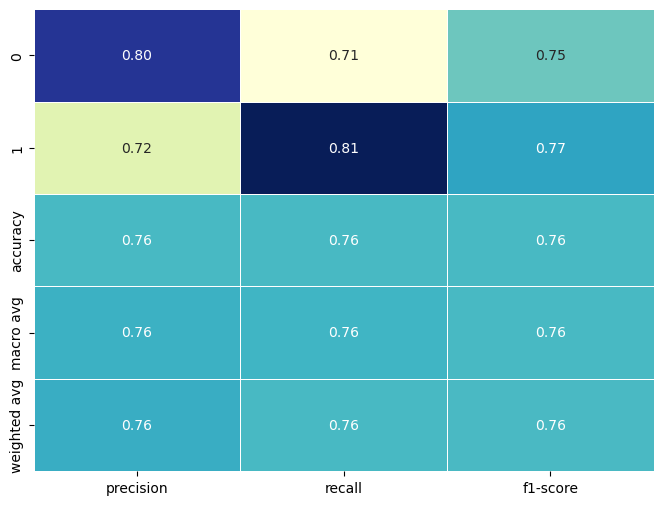

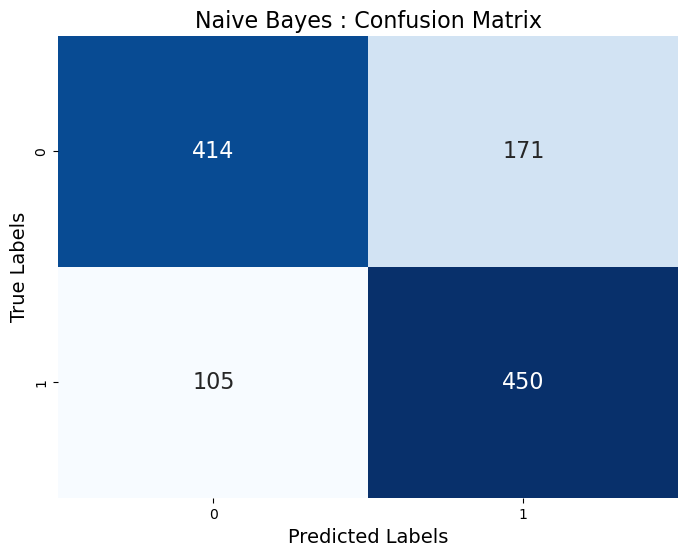

In [23]:
performance_nb = perform_classification(X_train,X_test,y_train,y_test,"Naive Bayes")

if performance_nb is not None:
    model_performance.update({performance_nb[0]: f'{performance_nb[2]:.4f}', 
                              f"{performance_nb[0]} best_params": performance_nb[1]})
    print(f"**Model:** {performance_nb[0]}")
    print(f"**Best Hyperparameters:** {performance_nb[1]}")
    print(f"**Accuracy:** {performance_nb[2]:.2f}")
    classification_report_df = pd.DataFrame(performance_nb[3]).T
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(classification_report_df.iloc[:, :3], annot=True, cmap="YlGnBu", cbar=False, fmt=".2f", linewidths=0.5)

    plt.show()

if performance_nb[4] is not None:
# Create a heatmap of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(performance_nb[4], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'{performance_nb[0]} : Confusion Matrix', fontsize=16)
    plt.show()

**Model:** Decision Tree
**Best Hyperparameters:** {'max_depth': 30}
**Accuracy:** 0.90


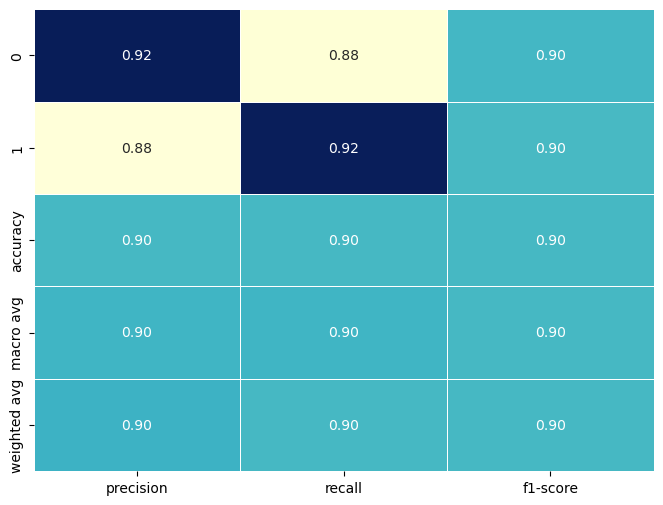

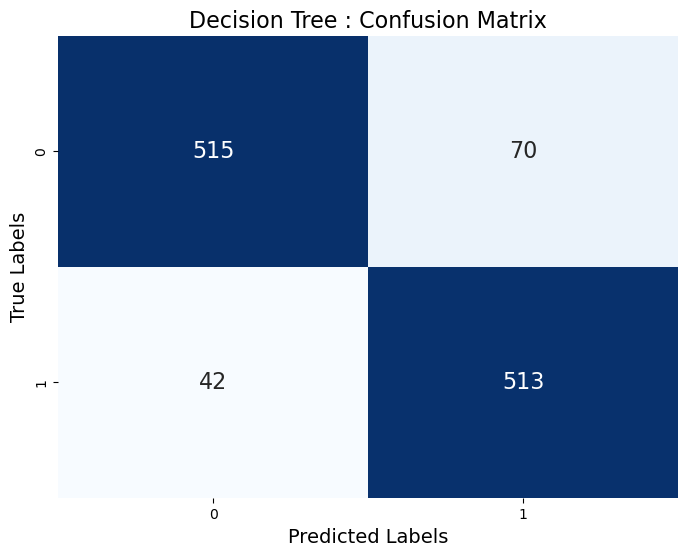

In [24]:
performance_dt = perform_classification(X_train,X_test,y_train,y_test,"Decision Tree")

if performance_dt is not None:
    model_performance.update({performance_dt[0]: f'{performance_dt[2]:.4f}', 
                              f"{performance_dt[0]} best_params": performance_dt[1]})
    print(f"**Model:** {performance_dt[0]}")
    print(f"**Best Hyperparameters:** {performance_dt[1]}")
    print(f"**Accuracy:** {performance_dt[2]:.2f}")
    classification_report_df = pd.DataFrame(performance_dt[3]).T
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(classification_report_df.iloc[:, :3], annot=True, cmap="YlGnBu", cbar=False, fmt=".2f", linewidths=0.5)

    plt.show()

if performance_dt[4] is not None:
# Create a heatmap of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(performance_dt[4], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'{performance_dt[0]} : Confusion Matrix', fontsize=16)
    plt.show()

**Model:** Random Forest
**Best Hyperparameters:** {'max_depth': 30, 'n_estimators': 200}
**Accuracy:** 0.96


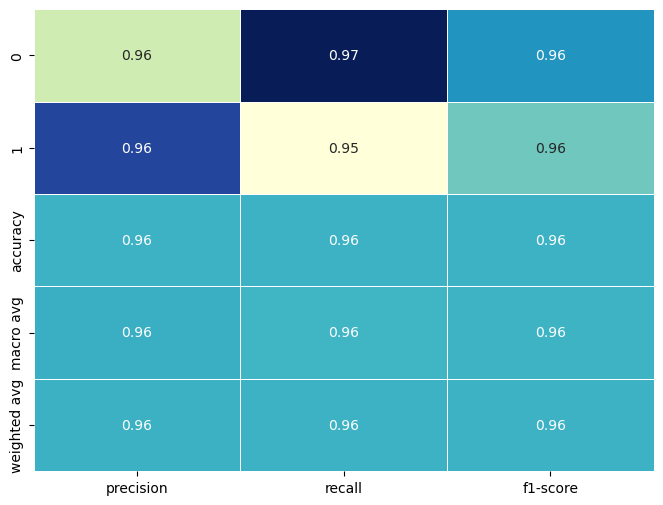

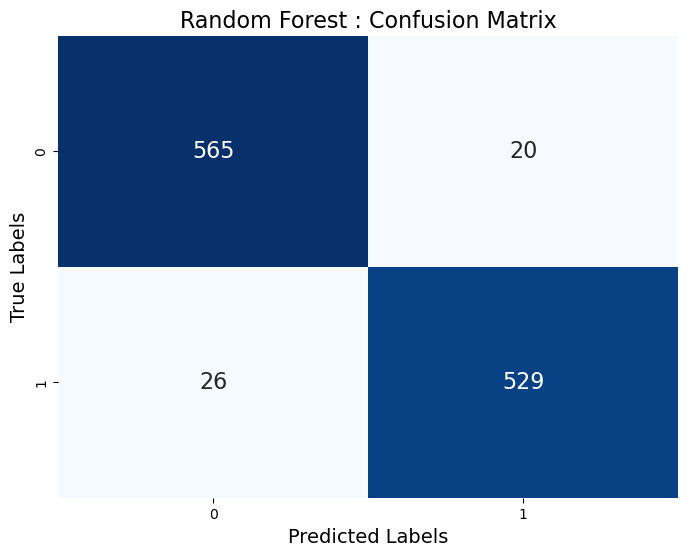

In [25]:
performance_rf = perform_classification(X_train,X_test,y_train,y_test,"Random Forest")

if performance_rf is not None:
    model_performance.update({performance_rf[0]: f'{performance_rf[2]:.4f}', 
                              f"{performance_rf[0]} best_params": performance_rf[1]})
    print(f"**Model:** {performance_rf[0]}")
    print(f"**Best Hyperparameters:** {performance_rf[1]}")
    print(f"**Accuracy:** {performance_rf[2]:.2f}")
    classification_report_df = pd.DataFrame(performance_rf[3]).T
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(classification_report_df.iloc[:, :3], annot=True, cmap="YlGnBu", cbar=False, fmt=".2f", linewidths=0.5)

    plt.show()

if performance_rf[4] is not None:
# Create a heatmap of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(performance_rf[4], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'{performance_rf[0]} : Confusion Matrix', fontsize=16)
    plt.show()

**Model:** Support Vector Machine
**Best Hyperparameters:** {'C': 1, 'kernel': 'rbf'}
**Accuracy:** 0.93


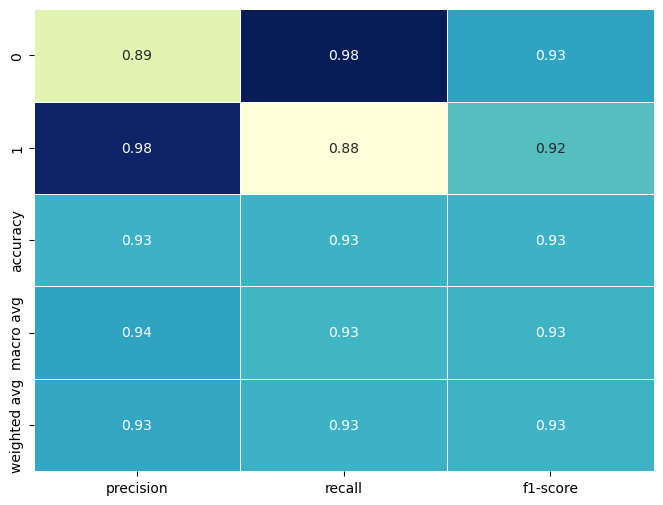

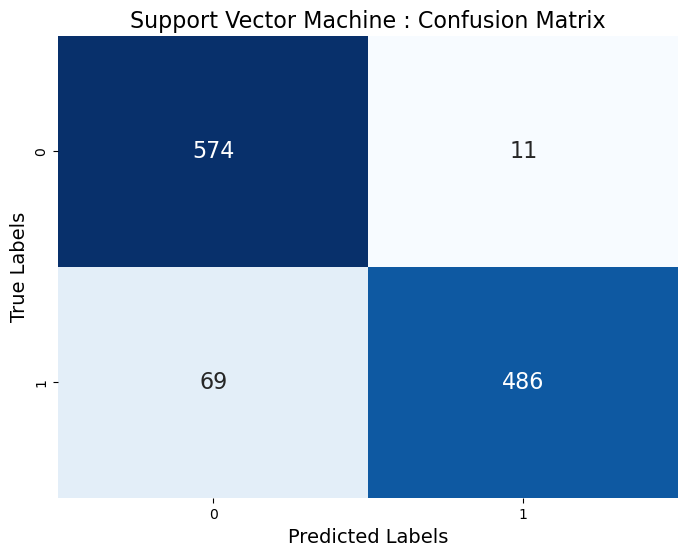

In [26]:
performance_svc = perform_classification(X_train,X_test,y_train,y_test,"Support Vector Machine")

if performance_svc is not None:
    model_performance.update({performance_svc[0]: f'{performance_svc[2]:.4f}', 
                              f"{performance_svc[0]} best_params": performance_svc[1]})
    print(f"**Model:** {performance_svc[0]}")
    print(f"**Best Hyperparameters:** {performance_svc[1]}")
    print(f"**Accuracy:** {performance_svc[2]:.2f}")
    classification_report_df = pd.DataFrame(performance_svc[3]).T
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(classification_report_df.iloc[:, :3], annot=True, cmap="YlGnBu", cbar=False, fmt=".2f", linewidths=0.5)

    plt.show()

if performance_svc[4] is not None:
# Create a heatmap of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(performance_svc[4], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'{performance_svc[0]} : Confusion Matrix', fontsize=16)
    plt.show()

**Model:** Gradient Boosting
**Best Hyperparameters:** {'learning_rate': 0.1, 'n_estimators': 200}
**Accuracy:** 0.93


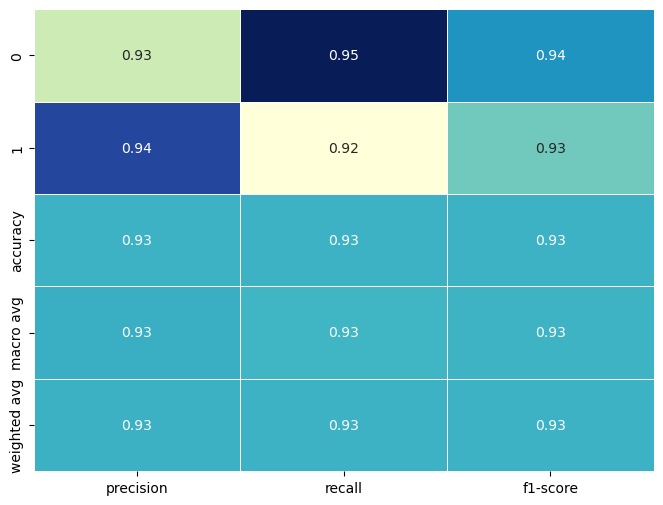

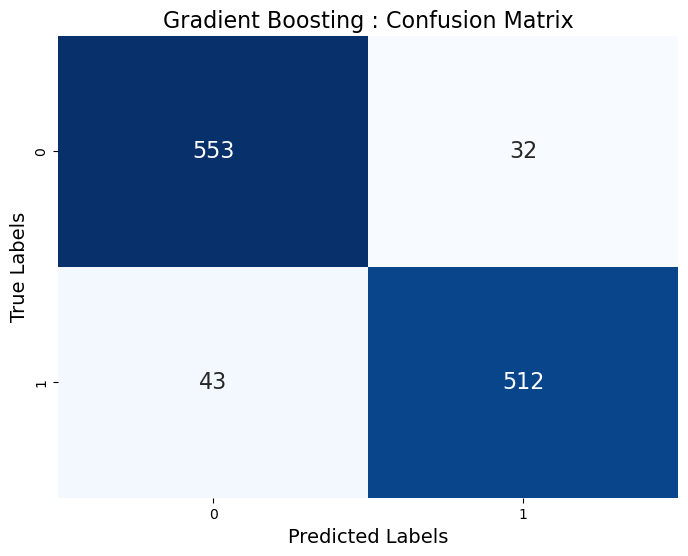

In [27]:
performance_gb = perform_classification(X_train,X_test,y_train,y_test,"Gradient Boosting")

if performance_gb is not None:
    model_performance.update({performance_gb[0]: f'{performance_gb[2]:.4f}', 
                              f"{performance_gb[0]} best_params": performance_gb[1]})
    print(f"**Model:** {performance_gb[0]}")
    print(f"**Best Hyperparameters:** {performance_gb[1]}")
    print(f"**Accuracy:** {performance_gb[2]:.2f}")
    classification_report_df = pd.DataFrame(performance_gb[3]).T
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(classification_report_df.iloc[:, :3], annot=True, cmap="YlGnBu", cbar=False, fmt=".2f", linewidths=0.5)

    plt.show()

if performance_gb[4] is not None:
# Create a heatmap of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(performance_gb[4], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'{performance_gb[0]} : Confusion Matrix', fontsize=16)
    plt.show()


**Model:** Neural Network
**Best Hyperparameters:** {'hidden_layer_sizes': (512, 256, 128), 'max_iter': 500}
**Accuracy:** 0.94


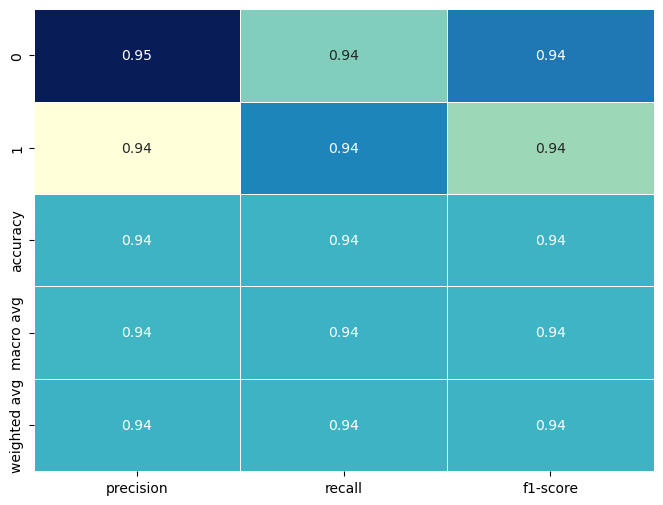

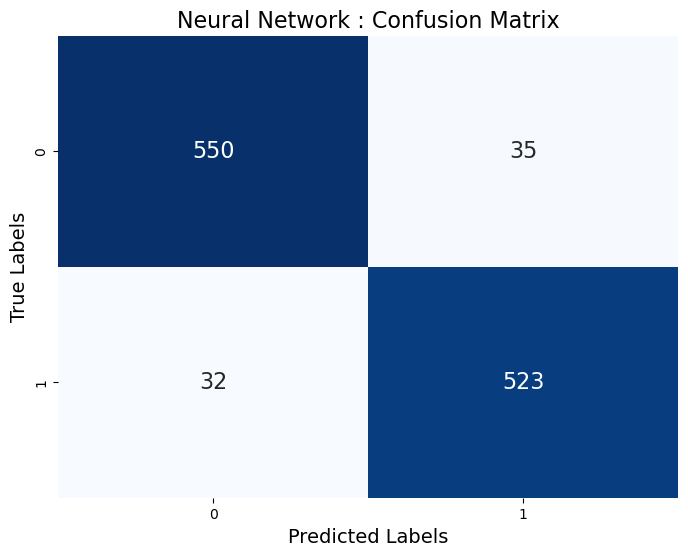

In [28]:
performance_nn = perform_classification(X_train,X_test,y_train,y_test,"Neural Network")

if performance_nn is not None:
    model_performance.update({performance_nn[0]: f'{performance_nn[2]:.4f}', 
                              f"{performance_nn[0]} best_params": performance_nn[1]})
    print(f"**Model:** {performance_nn[0]}")
    print(f"**Best Hyperparameters:** {performance_nn[1]}")
    print(f"**Accuracy:** {performance_nn[2]:.2f}")
    classification_report_df = pd.DataFrame(performance_nn[3]).T
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(classification_report_df.iloc[:, :3], annot=True, cmap="YlGnBu", cbar=False, fmt=".2f", linewidths=0.5)

    plt.show()

if performance_nn[4] is not None:
# Create a heatmap of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(performance_nn[4], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'{performance_nn[0]} : Confusion Matrix', fontsize=16)
    plt.show()


### Model Performance

The performance of each model was recorded, including the best hyperparameters and accuracy score. 

In [29]:
model_performance

{'Logistic Regression': '0.9149',
 'Logistic Regression best_params': {'C': 1},
 'K-Nearest Neighbors': '0.8851',
 'K-Nearest Neighbors best_params': {'n_neighbors': 3},
 'Naive Bayes': '0.7579',
 'Naive Bayes best_params': {},
 'Decision Tree': '0.9018',
 'Decision Tree best_params': {'max_depth': 30},
 'Random Forest': '0.9596',
 'Random Forest best_params': {'max_depth': 30, 'n_estimators': 200},
 'Support Vector Machine': '0.9298',
 'Support Vector Machine best_params': {'C': 1, 'kernel': 'rbf'},
 'Gradient Boosting': '0.9342',
 'Gradient Boosting best_params': {'learning_rate': 0.1, 'n_estimators': 200},
 'Neural Network': '0.9412',
 'Neural Network best_params': {'hidden_layer_sizes': (512, 256, 128),
  'max_iter': 500}}

### Saving the Best Model

We choose the Random Forest Model, as it gave us the highest accuracy of 0.9596, it requires less computation and have been proven to work good on churn data analysis

In [30]:
def save_model():
    
    model = RandomForestClassifier()
    
    return joblib.dump(model, 'customer_churn_nn.joblib')
    
save_model()
    

['customer_churn_nn.joblib']

# Conclusion

This project demonstrates the process of customer churn prediction using machine learning, from data preprocessing to model selection and evaluation. The best model can be used to predict customer churn effectively.